<font size=6>降维算法</font>
# 降维概述
克服机器学习中维度灾难问题，平衡维度消减与信息损失，达到最优化降维。
## 降维的目的 
1. 特征选择：选择重要的特征子集，删除其余特征； 
1. 特征提取：由原始特征形成的较少的新特征。

## 降维的作用
1. 降低数据的复杂度
2. 节省不必要特征的开销 
3. 去掉数据集中夹杂的噪音 
4. 提高数据的鲁棒性 
5. 当数据由较少的特征进行解释，我们可以更好地解释数据，提取知识 
6. 实现数据的可视化

## 降维应用

<img src="images/20180412155049524.png">

**最佳实践：**
1. 降维肯定会丢失一些信息，因此这种方法可以加快训练的速度的同时，也可能会让你的系统表现的稍微差一点;
2. 降维会让你的工作流水线更复杂；
3. 应该先尝试使用原始的数据来训练，如果训练速度太慢的话再考虑使用降维；
4. 在某些情况下，降低训练集数据的维度可能会筛选掉一些噪音和不必要的细节，这可能会让你的结果比降维之前更好，但是，这种情况通常不会发生，它只会加快你训练的速度；


# 降维的主要方法
## 投影
适用于数据聚集在高维空间的低维子空间的场景。

**高维：**
<img src="images/5eb95d6f18c3ae07b677d164bfb2c172.jpeg">

**低维：**
<img src="images/1a5ca39c58c6ec439533e59fc8a2e694.gif">

## 流形学习
适用于数据聚集在高维空间的低维**变形（流形）**子空间的场景。
<img src="images/1042406-20170109201731541-419567891.jpg">

# 主成分分析（PCA）
主成分分析（Principal Component Analysis）是目前为止最流行的降维算法。首先它找到接近数据集分布的超平面，，然后将所有的数据都投影到这个超平面上。

这个超平面满足如下约束：
1. 样本点到该超平面的距离和最小；
2. 样本的投影方差和最大；

（其中，1和2是等价的）

## 方差
我们希望投影后投影值尽可能分散，而这种分散程度，可以用数学上的方差来表述。此处，一个字段（特征）的方差可以看做是每个元素与字段均值的差的平方和的均值，即：

$$Var(a)=\frac{1}{m}\sum_{i=1}^m{(a_i-\mu)}^2,\mu=\frac{1}{m}\sum_{i=1}^m{(a_i)}$$

后面，我们假设数据集的每个字段都中心化处理过，即：

$$Var(a)=\frac{1}{m}\sum_{i=1}^m{(a_i)}^2$$

## 协方差
对于二维降成一维的问题来说，找到那个使得方差最大的方向就可以了。不过对于更高维，还有一个问题需要解决。

数学上可以用两个字段的协方差表示其相关性，即

$$Cov(a,b)=\frac{1}{m}\sum_{i=1}^m{a_ib_i}$$

当协方差为0时，表示两个字段完全独立。为了让协方差为0，我们选择第二个基时只能在与第一个基正交的方向上选择。因此最终选择的两个方向一定是正交的。

至此，我们得到了降维问题的优化目标：将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大（在正交的约束下，取最大的K个方差）。

## 协方差矩阵
假设我们只有a和b两个字段，那么我们将它们按行组成矩阵X：

$$X=\begin{pmatrix}a_1&\dots&a_m\\b_1&\dots&b_m\end{pmatrix}$$

可以得到如下：

$$\frac{1}{m}XX^T=\begin{pmatrix}\frac{1}{m}\sum_{i=1}^m{a_i^2}&\frac{1}{m}\sum_{i=1}^m{a_ib_i}\\\frac{1}{m}\sum_{i=1}^m{b_ia_i}&\frac{1}{m}\sum_{i=1}^m{b_i^2}\end{pmatrix}$$

## 协方差矩阵对角化
根据上述推导，我们发现要达到优化目标，等价于将协方差矩阵对角化：即协方差矩阵除对角线外的其它元素化为0，并且在对角线上将元素按大小从上到下排列，这样我们就达到了优化目的。我们进一步看下原矩阵与基变换后矩阵协方差矩阵的关系：

设原始数据矩阵X对应的协方差矩阵为C，而P是一组基按行组成的矩阵，设Y=PX，则Y为X对P做基变换后的数据。设Y的协方差矩阵为D，我们推导一下D与C的关系：

$D$$=\frac{1}{m}YY^T\\=\frac{1}{m}(PX){(PX)}^T\\=\frac{1}{m}PXX^TP^T\\=P(\frac{1}{m}XX^T)P^T\\=PCP^T$

至此，优化目标变成了寻找一个矩阵P，满足$PCP^{T}$是一个对角矩阵，并且对角元素按从大到小依次排列，那么P的前K行就是要寻找的基，用P的前K行组成的矩阵乘以X就使得X从N维降到了K维并满足上述优化条件。

协方差矩阵C是一个是对称矩阵，在线性代数上，实对称矩阵有一系列非常好的性质：
1. 实对称矩阵不同特征值对应的特征向量必然正交。
2. 设特征向量$\lambda$重数为r，则必然存在r个线性无关的特征向量对应于$\lambda$，因此可以将这r个特征向量单位正交化。

由上面两条可知，一个n行n列的实对称矩阵一定可以找到n个单位正交特征向量，设这n个特征向量为$e_1,e_2,\cdots,e_n$，我们将其按列组成矩阵：

$E=(e_1,e_2,\cdots,e_n)$

则对协方差矩阵C有如下结论：

$$E^TCE=\Lambda=\begin{bmatrix}\lambda_1 & &\\ &\ddots&\\ &&\lambda_n\end{bmatrix}$$

到这里，我们发现我们已经找到了需要的矩阵P：

$P=E^T$

P是协方差矩阵的特征向量单位化后按行排列出的矩阵，其中每一行都是C的一个特征向量。如果设P按照$\Lambda$中特征值的从大到小，将特征向量从上到下排列，则用P的前K行组成的矩阵乘以原始数据矩阵X，就得到了我们需要的降维后的数据矩阵Y。

## 算法步骤：
设有m条n维数据。
1. 将原始数据按列组成n行m列矩阵X
2. 将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值
3. 求出协方差矩阵
4. 求出协方差矩阵的特征值及对应的特征向量
5. 将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P
6. Y=PX即为降维到k维后的数据

## PCA算法总结
PCA算法的主要优点有：
1. 仅仅需要以方差衡量信息量，不受数据集以外的因素影响。　
2. 各主成分之间正交，可消除原始数据成分间的相互影响的因素。
3. 计算方法简单，主要运算是特征值分解，易于实现。

PCA算法的主要缺点有：
1. 主成分各个特征维度的含义具有一定的模糊性，不如原始样本特征的解释性强。
2. 方差小的非主成分也可能含有对样本差异的重要信息，因降维丢弃可能对后续数据处理有影响。

## sklearn的PCA类
在scikit-learn中，与PCA相关的类都在sklearn.decomposition包中。最常用的PCA类就是sklearn.decomposition.PCA，我们下面主要也会讲解基于这个类的使用的方法。

除了PCA类以外，最常用的PCA相关类还有KernelPCA类，它主要用于非线性数据的降维，需要用到核技巧。因此在使用的时候需要选择合适的核函数并对核函数的参数进行调参。

另外一个常用的PCA相关类是IncrementalPCA类，它主要是为了解决单机内存限制的。有时候我们的样本量可能是上百万+，维度可能也是上千，直接去拟合数据可能会让内存爆掉， 此时我们可以用IncrementalPCA类来解决这个问题。IncrementalPCA先将数据分成多个batch，然后对每个batch依次递增调用partial_fit函数，这样一步步的得到最终的样本最优降维。

此外还有SparsePCA和MiniBatchSparsePCA。他们和上面讲到的PCA类的区别主要是使用了L1的正则化，这样可以将很多非主要成分的影响度降为0，这样在PCA降维的时候我们仅仅需要对那些相对比较主要的成分进行PCA降维，避免了一些噪声之类的因素对我们PCA降维的影响。SparsePCA和MiniBatchSparsePCA之间的区别则是MiniBatchSparsePCA通过使用一部分样本特征和给定的迭代次数来进行PCA降维，以解决在大样本时特征分解过慢的问题，当然，代价就是PCA降维的精确度可能会降低。使用SparsePCA和MiniBatchSparsePCA需要对L1正则化参数进行调参。

## sklearn.decomposition.PCA参数介绍
1. n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数。当然，我们还可以将参数设置为"mle", 此时PCA类会用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。我们也可以用默认值，即不输入n_components，此时n_components=min(样本数，特征数)。
2. whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。
3. svd_solver：即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。


除了这些输入参数外，有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

## PCA实例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], 
                  cluster_std=[0.2, 0.1, 0.2, 0.2],                   random_state =9)

d:\env\pythonve\test36\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


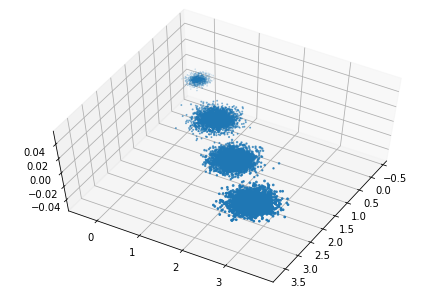

In [3]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=60, azim=30)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
pca.explained_variance_ratio_,pca.explained_variance_

(array([0.98318212, 0.00850037, 0.00831751]),
 array([3.78521638, 0.03272613, 0.03202212]))

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_, pca.explained_variance_

(array([0.98318212, 0.00850037]), array([3.78521638, 0.03272613]))

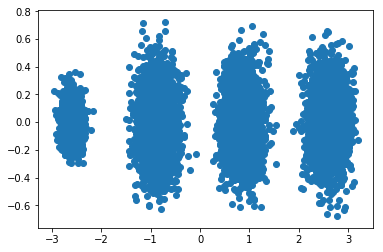

In [6]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [7]:
pca = PCA(n_components=0.95)
pca.fit(X)
pca.explained_variance_ratio_, pca.explained_variance_, pca.n_components_

(array([0.98318212]), array([3.78521638]), 1)

In [8]:
pca = PCA(n_components=0.99)
pca.fit(X)
pca.explained_variance_ratio_, pca.explained_variance_, pca.n_components_

(array([0.98318212, 0.00850037]), array([3.78521638, 0.03272613]), 2)

In [9]:
pca = PCA(n_components='mle')
pca.fit(X)
pca.explained_variance_ratio_, pca.explained_variance_, pca.n_components_

(array([0.98318212]), array([3.78521638]), 1)

# 局部线性嵌入(LLE)
局部线性嵌入(Locally Linear Embedding，以下简称LLE)也是非常重要的降维方法。和传统的PCA，LDA等关注样本方差的降维方法相比，LLE关注于降维时保持样本局部的线性特征，由于LLE在降维时保持了样本的局部特征，它广泛的用于图像图像识别，高维数据可视化等领域。

LLE属于流形学习(Manifold Learning)的一种。

## LLE思想
LLE首先假设数据在较小的局部是线性的，也就是说，某一个数据可以由它邻域中的几个样本来线性表示。比如我们有一个样本$x_1$,我们在它的原始高维邻域里用K-近邻思想找到和它最近的三个样本$x_2,x_3,x_4$. 然后我们假设$x_1$可以由$x_2,x_3,x_4$线性表示，即：

$$x_1=w_{12}x_2+w_{13}x_3+w_{14}x_4$$

其中，$w_{12}，w_{13}，w_{14}$为权重系数。在我们通过LLE降维后，我们希望$x_1$在低维空间对应的投影$x^′_1$和$x_2,x_3,x_4$.对应的投影$x^′_2,x^′_3,x^′_4$.也尽量保持同样的线性关系，即:

$$x_1^′\approx w_{12}x_2^′+w_{13}x_3^′+w_{14}x_4^′$$

也就是说，投影前后线性关系的权重系数$w_{12}，w_{13}，w_{14}$是尽量不变或者最小改变的。

线性关系只在样本的附近起作用，离样本远的样本对局部的线性关系没有影响，因此降维的复杂度降低了很多。

## LLE算法流程
1. 求K近邻
2. 对每个样本求它在邻域里的K个近邻的线性关系，得到线性关系权重系数W
3. 利用权重系数来在低维里重构样本数据
<img src="images/1042406-20170110114643806-1397788141.png">

## LLE总结
LLE是广泛使用的图形图像降维方法，它实现简单，但是对数据的流形分布特征有严格的要求。比如不能是闭合流形，不能是稀疏的数据集，不能是分布不均匀的数据集等等，这限制了它的应用。

LLE算法的主要优点有：

1. 可以学习任意维的局部线性的低维流形
2. 算法归结为稀疏矩阵特征分解，计算复杂度相对较小，实现容易。

LLE算法的主要缺点有：
1. 算法所学习的流形只能是不闭合的，且样本集是稠密均匀的。
2. 算法对最近邻样本数的选择敏感，不同的最近邻数对最后的降维结果有很大影响。

 

## sklearn流形学习库
在scikit-learn中，流形学习库在sklearn.manifold包中。里面实现的流形学习算法有：
1. 多维尺度变换MDS算法：这个对应的类是MDS。MDS算法希望在降维时在高维里样本之间的欧式距离关系在低维可以得到保留。由于降维时它需要考虑了样本的全局欧式距离关系，因此降维计算量很大，现在一般较少使用了。
1. 等距映射ISOMAP算法：这个对应的类是Isomap。 ISOMAP算法使用了样本间的测地距离来代替欧式距离，此外基本和MDS算法相同。由于降维时它仍然需要考虑了样本的全局测地距离关系，因此降维计算量很大。
1. 局部线性嵌入LLE算法：这个对应的类是LocallyLinearEmbedding。这个就是我们介绍的LLE算法、除了包含我们讲到的标准的LLE实现以外，它还支持改进版的LLE算法，包括MLLE，HLLE和LTSA。
1. 拉普拉斯特征映射LE算法：这个对应的类是SpectralEmbedding。这个算法使用了图论的方法，用样本构成的无向图对应的拉普拉斯矩阵作特征分解来降维。
1. t-distributed Stochastic Neighbor Embedding（t-SNE）算法:这个对应的类是TSNE。这个是一个比较新的降维方法。t-SNE希望样本间的在高维对应的高斯核函数相似度在低维可以得到保留，即低维和高维有尽量一样的相似度矩阵。

这些算法基本原理很类似，都基于流形降维后保持样本之间的某一个特定的关系而产生。下面我们重点讲述LLE算法的使用，即LocallyLinearEmbedding的使用。

## LLE算法类库介绍

LLE算法类LocallyLinearEmbedding使用起来并不复杂，一般来说，需要调参的参数只有样本近邻的个数。下面我们对LocallyLinearEmbedding的主要参数做一个介绍。
1. n_neighbors：即我们搜索样本的近邻的个数，默认是5。 

2. n_components：即我们降维到的维数。

3. reg ：正则化系数，在n_neighbors大于n_components时，即近邻数大于降维的维数时，由于我们的样本权重矩阵不是满秩的，LLE通过正则化来解决这个问题。默认是0.001。

4. eigen_solver：特征分解的方法。有‘arpack’和‘dense’两者算法选择。当然也可以选择'auto'让scikit-learn自己选择一个合适的算法。

5. method： 即LLE的具体算法。LocallyLinearEmbedding支持4种LLE算法，分别是'standard'对应标准的LLE算法，'hessian'对应HLLE算法，'modified'对应MLLE算法，‘ltsa’对应LTSA算法。默认是'standard'。

6. neighbors_algorithm：这个是k近邻的搜索方法，和KNN算法的使用的搜索方法一样。算法一共有三种，第一种是蛮力实现，第二种是KD树实现，第三种是球树实现。

## 案例

In [10]:
from sklearn.utils import check_random_state
from sklearn import manifold

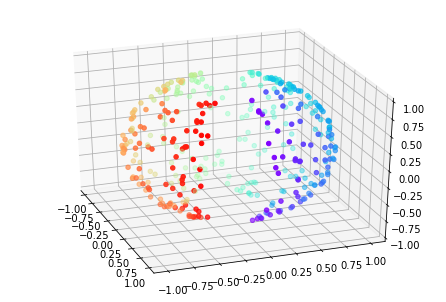

In [11]:
n_samples = 500
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# 让球体不闭合，符合流形定义
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=-20)
ax.scatter(x, y, z, c=p[indices], marker='o', cmap=plt.cm.rainbow)

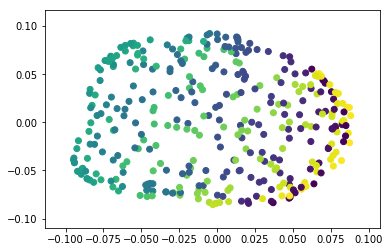

In [12]:
train_data = np.array([x, y, z]).T
trans_data = manifold.LocallyLinearEmbedding(n_neighbors =30, n_components = 2,
                                method='standard').fit_transform(train_data)
plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)

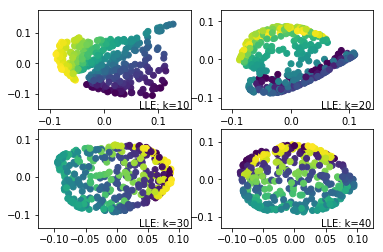

In [13]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trans_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='standard').fit_transform(train_data)
    plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('LLE: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

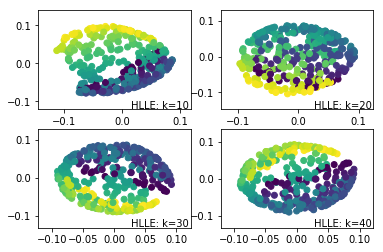

In [14]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trans_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='hessian').fit_transform(train_data)
    plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('HLLE: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

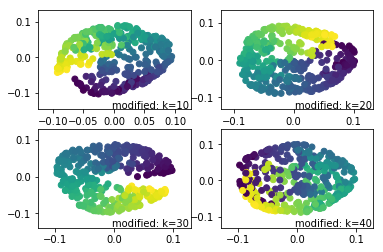

In [15]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trans_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='modified').fit_transform(train_data)
    plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('modified: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

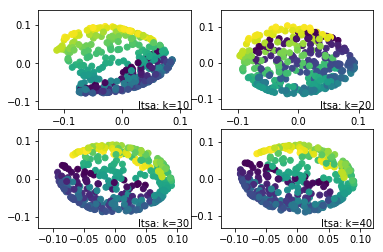

In [16]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trans_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='ltsa').fit_transform(train_data)
    plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('ltsa: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

同样的k-近邻数情况下， MLLE,HLLE和LTSA降维的可视化效果更好。同样的算法，k-近邻数越大则降维可视化效果越好。